## Problem1: Data Acquisition and Analysis

In [81]:
%load_ext autoreload
%autoreload 2
import pb_1 as p1
import pb_2 as p2
import pb_3 as p3
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Download reported crime data

- __Get the data from the chicago data portal 2001-present crime dataset.__ 
- __Filter the data based on the column of year (keep 2017 and 2018)__
- __Trim the data, only keep the useful columns__

In [63]:
crime_data = p1.get_crime()

In [64]:
crime_data.iloc[0] #check the result

block             026XX S CALIFORNIA BLVD
case_number                      JA529032
community_area                         30
date                  2017-11-28 21:43:00
latitude                          41.8438
longitude                        -87.6946
primary_type                OTHER OFFENSE
ward                                   12
year                                 2017
Name: 0, dtype: object

#### __Get the communities data__

In [68]:
communities = p1.get_community()

#### __Merge two dataframe on community number__

In [69]:
crime_com = pd.merge(crime_data, communities,on = 'community_area')
crime_com.iloc[0]

block             026XX S CALIFORNIA BLVD
case_number                      JA529032
community_area                         30
date                  2017-11-28 21:43:00
latitude                          41.8438
longitude                        -87.6946
primary_type                OTHER OFFENSE
ward                                   12
year                                 2017
community                  SOUTH LAWNDALE
Name: 0, dtype: object

,latitude,longitude,ward,year
count,528525.000000,528525.000000,534355.000000,534355.000000
mean,41.844448,-87.670097,23.357762,2017.498279
std,0.085873,0.058528,14.121328,0.499998
min,41.644590,-87.934273,1.000000,2017.000000
25%,41.769634,-87.712333,10.000000,2017.000000
50%,41.865440,-87.663650,24.000000,2017.000000
75%,41.905838,-87.627799,35.000000,2018.000000
max,42.022671,-87.524529,50.000000,2018.000000


### 2. Generate summary statistics

#### __Number of crimes of each type__

In [70]:
type_cnt = crime_com.groupby("primary_type").size().reset_index(name="cnt")\
           .sort_values(by = 'cnt',ascending=False)
type_cnt['percent'] = type_cnt['cnt']/len(crime_com)
type_cnt

,primary_type,cnt,percent
30,THEFT,129425,0.242209
2,BATTERY,98995,0.185261
6,CRIMINAL DAMAGE,56848,0.106387
1,ASSAULT,39678,0.074254
8,DECEPTIVE PRACTICE,37753,0.070652
23,OTHER OFFENSE,34355,0.064293
3,BURGLARY,24730,0.046280
17,NARCOTICS,24644,0.046119
27,ROBBERY,21560,0.040348
16,MOTOR VEHICLE THEFT,21393,0.040035


#### __Graph of the different type of crime in 2017 and 2018 in city of chicago__

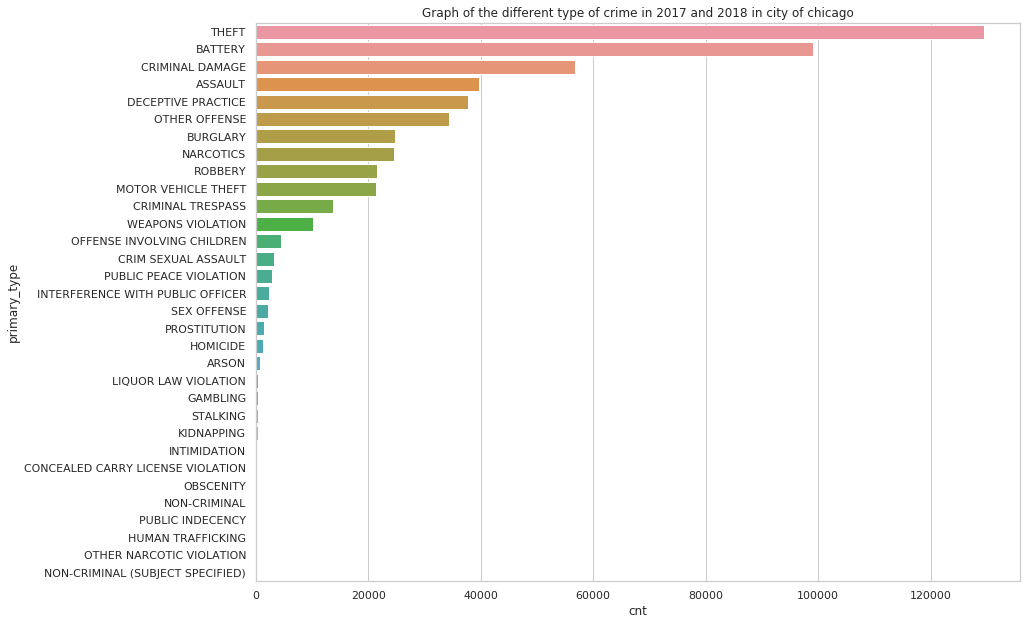

In [71]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
title = 'Graph of the different type of crime in 2017 and 2018 in city of chicago'
ax = sns.barplot(x="cnt", y="primary_type", data=type_cnt, order = type_cnt.primary_type).set_title(title)

#### __Different type of crime change over time__

Text(0.5, 1.0, 'Different type of crime change over time (base on 2017 and 2018 data)')

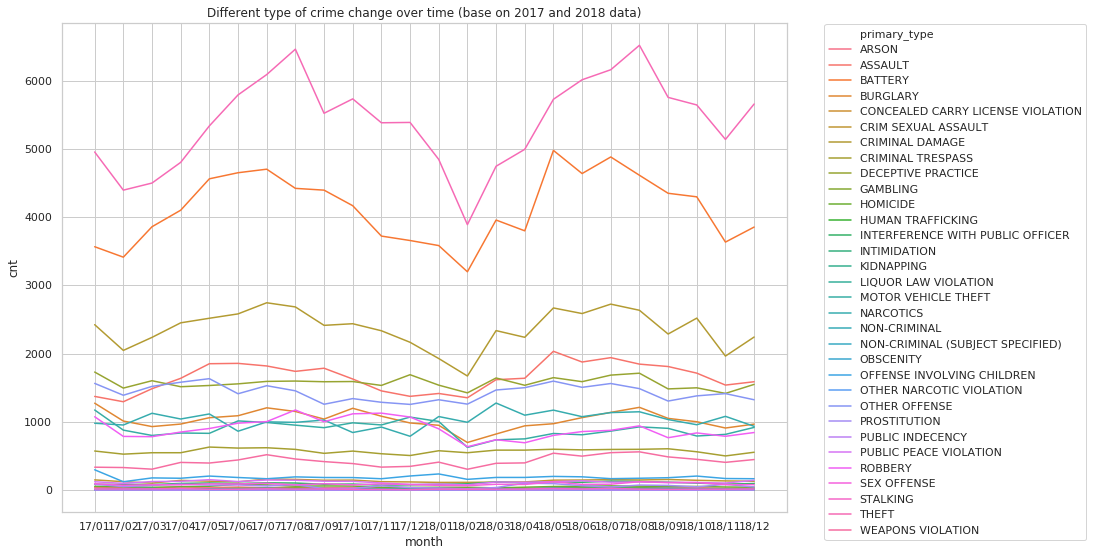

In [88]:
crime_com['month'] = crime_com.date.dt.strftime('%y/%m')
gp = crime_com.groupby([crime_com.month, crime_com.primary_type]).size().reset_index(name="cnt")
pure = gp.pivot(index='month', columns='primary_type', values='cnt').unstack().reset_index(name='cnt')
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.lineplot(x="month", y="cnt", hue="primary_type",legend='brief',
                  style ="primary_type", data = pure, dashes =False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
ax.set_title('Different type of crime change over time (base on 2017 and 2018 data)')

#### Rank the crime by community based on 2017 and 2018 data

In [89]:
gp = crime_com.groupby("community").size().reset_index(name="cnt")
gp.sort_values(by = "cnt", ascending=False, inplace=True)
gp

,community,cnt
5,AUSTIN,30429
47,NEAR NORTH SIDE,25367
41,LOOP,21480
49,NEAR WEST SIDE,18448
52,NORTH LAWNDALE,18377
65,SOUTH SHORE,17325
32,HUMBOLDT PARK,16095
75,WEST TOWN,15625
4,AUBURN GRESHAM,14897
70,WEST ENGLEWOOD,14016


#### Graph of the rank of the crime count by community

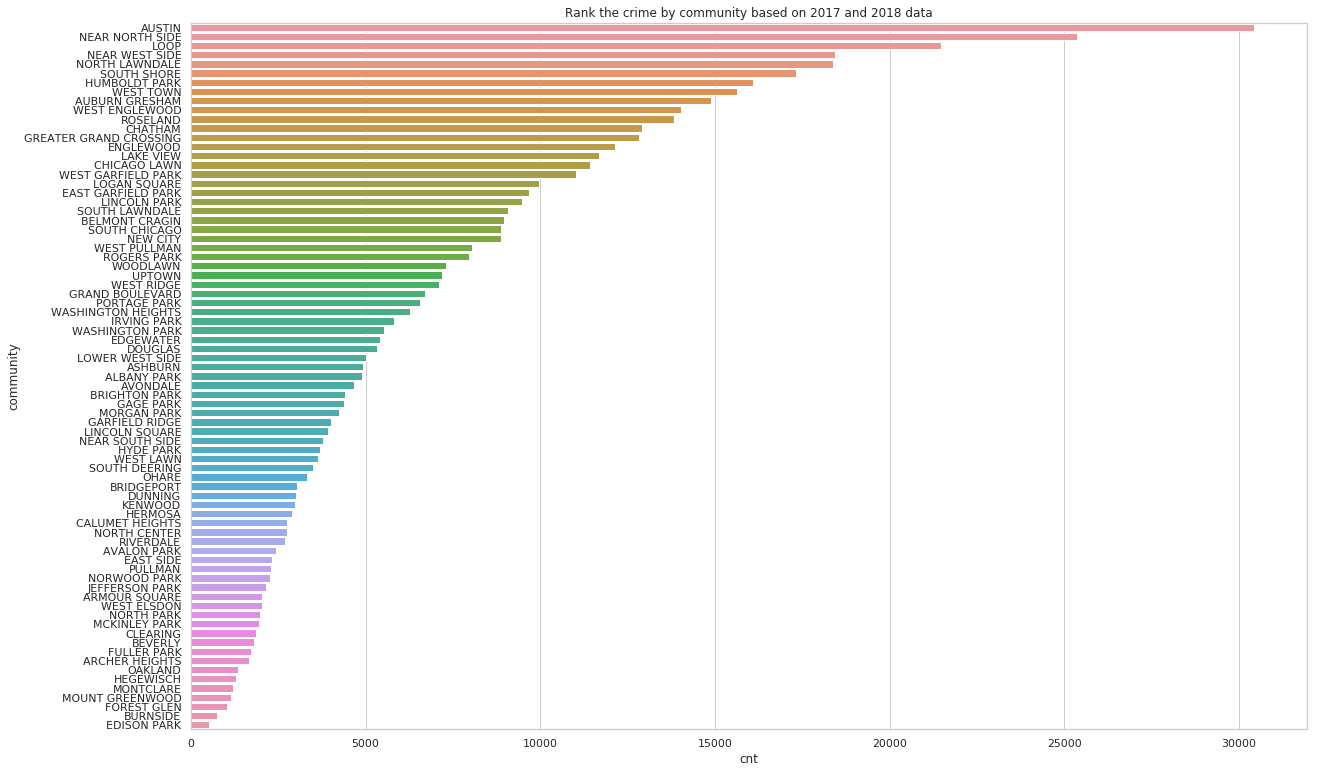

In [90]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(20, 13)
title = 'Rank the crime by community based on 2017 and 2018 data'
ax = sns.barplot(x="cnt", y="community", data=gp, order = gp.community).set_title(title)

#### Heatmap of the crime of 2017 and 2018 in Chicago's 77 neighborhood

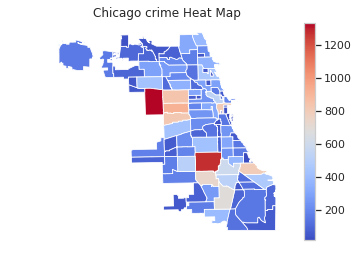

In [93]:
geo = p1.link_with_neighborhoods(crime_com[crime_com.month=='17/07'], 'longitude', 'latitude')
graph = p1.map_city(geo)
graph.show()

## Problem2: Data Augmentation and APIs